In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
large_data = pd.read_csv('onlinefraud.csv')
large_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
large_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
large_data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
large_data['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
# Separate the two kinds of data
kind1_data = large_data[large_data['isFraud'] == 0]
kind2_data = large_data[large_data['isFraud'] == 1]

# Sample a specific number of rows from each kind
sample_size = 8000  # Adjust as needed
sampled_kind1 = kind1_data.sample(n=sample_size, random_state=42)
sampled_kind2 = kind2_data.sample(n=sample_size, random_state=42)

# Concatenate the sampled data back together if needed
data = pd.concat([sampled_kind1, sampled_kind2], ignore_index=True)


In [7]:
data['isFraud'].value_counts()

isFraud
0    8000
1    8000
Name: count, dtype: int64

In [8]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 0
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

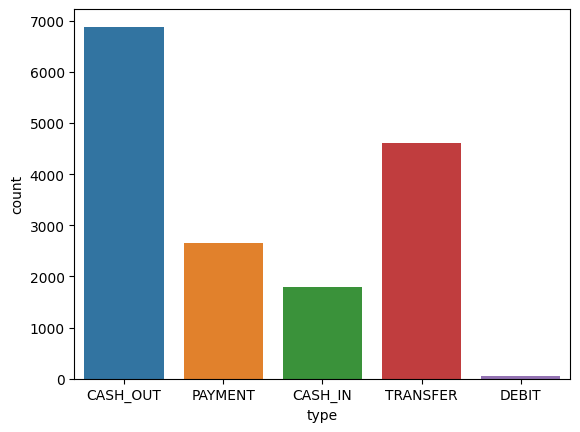

In [9]:
sns.countplot(x='type', data=data)


In [10]:
data.type.value_counts()

type
CASH_OUT    6884
TRANSFER    4615
PAYMENT     2664
CASH_IN     1789
DEBIT         48
Name: count, dtype: int64

<Axes: xlabel='step', ylabel='Density'>

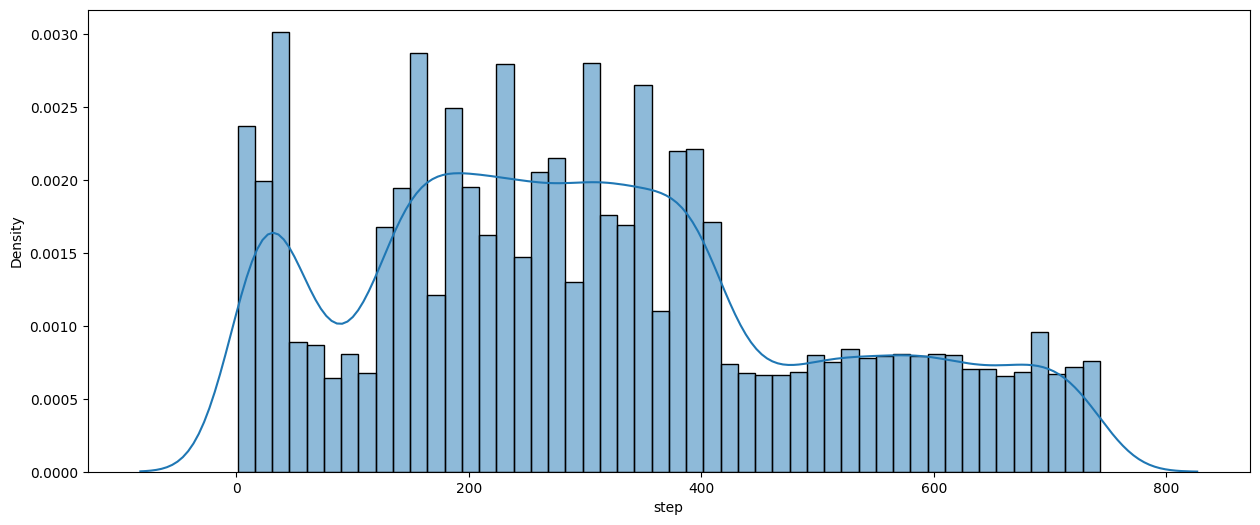

In [11]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50,kde= True,stat="density", kde_kws=dict(cut=3))


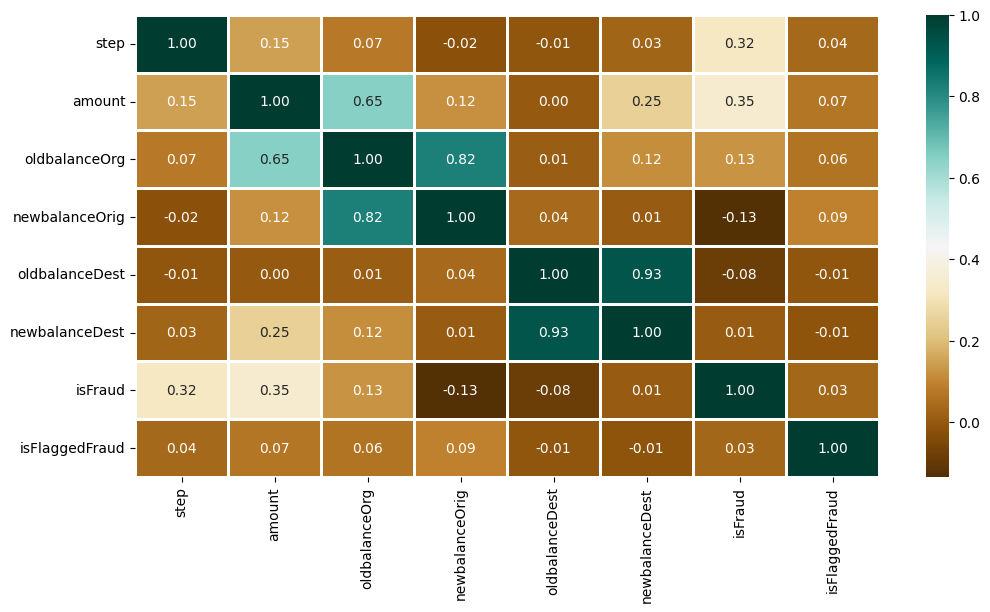

In [12]:

# Exclude non-numeric columns from the correlation matrix calculation
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data[numeric_columns]

# Calculate correlation matrix
corr_matrix = data_numeric.corr()

# Set up the figure and heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix,
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.show()


In [13]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,162,CASH_OUT,183806.32,C691771226,19391.00,0.00,C1416312719,382572.19,566378.51,0,0,True,False,False,False
1,137,PAYMENT,521.37,C203378011,0.00,0.00,M42773300,0.00,0.00,0,0,False,False,True,False
2,179,PAYMENT,3478.18,C1698571270,19853.00,16374.82,M643984524,0.00,0.00,0,0,False,False,True,False
3,355,PAYMENT,1716.05,C913764937,5769.17,4053.13,M1387429131,0.00,0.00,0,0,False,False,True,False
4,354,CASH_IN,253129.93,C2017736577,1328499.49,1581629.42,C407484102,2713220.48,2460090.55,0,0,False,False,False,False


In [14]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest','isFlaggedFraud'], axis=1)
y = data_new['isFraud']


In [15]:
X.shape, y.shape


((16000, 10), (16000,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)  # transforms using z-score formula
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-0.99839401,  0.08521956, -0.08630182, ..., -0.05268339,
        -0.44812369,  1.57219327],
       [ 0.43321938, -0.39231801, -0.35678972, ..., -0.05268339,
        -0.44812369,  1.57219327],
       [-1.42581815, -0.37680187, -0.34800104, ..., -0.05268339,
        -0.44812369,  1.57219327],
       ...,
       [-0.30318607, -0.29939148,  2.12929501, ..., -0.05268339,
        -0.44812369, -0.63605411],
       [-0.81815491,  2.54935081,  1.30943696, ..., -0.05268339,
        -0.44812369, -0.63605411],
       [-0.38043139, -0.4252022 , -0.38281039, ..., -0.05268339,
         2.23152676, -0.63605411]])

In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [20]:
X_train_scaled

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,-0.998394,0.085220,-0.086302,-0.214636,-0.223187,-0.310347,-0.865394,-0.052683,-0.448124,1.572193
1,0.433219,-0.392318,-0.356790,-0.214636,-0.223187,-0.310347,-0.865394,-0.052683,-0.448124,1.572193
2,-1.425818,-0.376802,-0.348001,-0.214636,-0.223187,-0.310347,-0.865394,-0.052683,-0.448124,1.572193
3,0.227232,0.629456,0.221966,-0.214636,-0.223187,0.184397,1.155543,-0.052683,-0.448124,-0.636054
4,-0.843903,-0.386446,-0.353464,-0.214636,-0.223187,-0.310347,-0.865394,-0.052683,-0.448124,1.572193
...,...,...,...,...,...,...,...,...,...,...
11195,1.442558,-0.433495,-0.380113,-0.214636,-0.223187,-0.310347,-0.865394,-0.052683,-0.448124,1.572193
11196,-1.492764,-0.438002,-0.378057,-0.208721,-0.204014,-0.290575,1.155543,-0.052683,-0.448124,-0.636054
11197,-0.303186,-0.299391,2.129295,3.116685,-0.111551,-0.273587,-0.865394,-0.052683,-0.448124,-0.636054
11198,-0.818155,2.549351,1.309437,-0.214636,-0.223187,1.070435,1.155543,-0.052683,-0.448124,-0.636054


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [22]:
lr_scaled = LogisticRegression()


In [23]:
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [25]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [26]:
print("Accuracy Score",accuracy_score(y_test,y_pred_scaled))
print("Precision score",precision_score(y_test,y_pred_scaled))
print("recall score",recall_score(y_test,y_pred_scaled))
print("Precision score",f1_score(y_test,y_pred_scaled))
print("recall score",matthews_corrcoef(y_test,y_pred_scaled))

Accuracy Score 0.9247916666666667
Precision score 0.931827865360034
recall score 0.9158291457286433
Precision score 0.9237592397043294
recall score 0.849690746420474


In [27]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
# predictions
y_pred_scaled1 = rfc.predict(X_test_scaled)

In [28]:
print("Accuracy Score",accuracy_score(y_test,y_pred_scaled1))
print("Precision score",precision_score(y_test,y_pred_scaled1))
print("recall score",recall_score(y_test,y_pred_scaled1))
print("f1_score",f1_score(y_test,y_pred_scaled1))
print("matthews_corrcoef",matthews_corrcoef(y_test,y_pred_scaled1))

Accuracy Score 0.9920833333333333
Precision score 0.9871475953565506
recall score 0.9970686767169179
f1_score 0.9920833333333333
matthews_corrcoef 0.9842162720734685


In [29]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [30]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [31]:
prediction_SVM_all = classifier.predict(X_test_scaled)

In [32]:
print("Accuracy Score",accuracy_score(y_test,prediction_SVM_all))
print("Precision score",precision_score(y_test,prediction_SVM_all))
print("recall score",recall_score(y_test,prediction_SVM_all))
print("f1 score",f1_score(y_test,prediction_SVM_all))
print("matthew corrcoeff",matthews_corrcoef(y_test,prediction_SVM_all))

Accuracy Score 0.93125
Precision score 0.9466145833333334
recall score 0.9133165829145728
f1 score 0.9296675191815857
matthew corrcoeff 0.8630014564989206


In [33]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
y_pred_scaled_xgb = xgb.predict(X_test_scaled)

In [35]:
print("Accuracy Score",accuracy_score(y_test,y_pred_scaled_xgb))
print("Precision score",precision_score(y_test,y_pred_scaled_xgb))
print("recall score",recall_score(y_test,y_pred_scaled_xgb))
print("F1 score",f1_score(y_test,y_pred_scaled_xgb))
print("Matthew corrcoeff",matthews_corrcoef(y_test,y_pred_scaled_xgb))

Accuracy Score 0.9933333333333333
Precision score 0.9887966804979254
recall score 0.9979061976549414
F1 score 0.9933305543976658
Matthew corrcoeff 0.9867083990392602


In [36]:


def get_model_name(model):
    if isinstance(model, XGBClassifier):
        return 'XGBClassifier()'
    else:
        return repr(model)

models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for model in models:
    model.fit(X_train, y_train)
    model_name = get_model_name(model)
    
    print(f'{model_name} :')
    
    train_preds = model.predict_proba(X_train)[:, 1]
    print('Training Accuracy:', ras(y_train, train_preds))
    
    y_preds = model.predict_proba(X_test)[:, 1]
    print('Validation Accuracy:', ras(y_test, y_preds))
    print()


LogisticRegression() :
Training Accuracy: 0.9592226443896935
Validation Accuracy: 0.9626818795469887

XGBClassifier() :
Training Accuracy: 0.9999999999999999
Validation Accuracy: 0.9995746421438314

SVC(probability=True) :
Training Accuracy: 0.9600210217802021
Validation Accuracy: 0.9611717723498643

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) :
Training Accuracy: 0.9999965879945366
Validation Accuracy: 0.9980150545430302



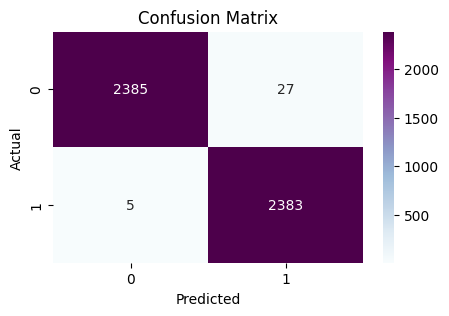

In [37]:
from sklearn.metrics import confusion_matrix


model = models[1]  

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
